In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
import os

In [28]:
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
save_path = os.path.join(BASE_DIR, "web", "predictor", "titanic_model.pkl")

In [29]:
train_data = pd.read_csv('../data/processed/train_features.csv')
X = train_data[["Sex","Pclass","Fare","FamilySize",
                "AgeBin_Child","AgeBin_Teen","AgeBin_Adult", "AgeBin_Middle Aged","AgeBin_Senior",
                "Embarked_C","Embarked_Q","Embarked_S",
                "Title_Master", "Title_Miss","Title_Mrs","Title_Mr","Title_Rare",
                ]].copy()
y = train_data['Survived']

In [8]:
X.head()

,Sex,Pclass,Fare,FamilySize,AgeBin_Child,AgeBin_Teen,AgeBin_Adult,AgeBin_Middle Aged,AgeBin_Senior,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mrs,Title_Mr,Title_Rare
0,0,3,7.2500,2,0,0,1,0,0,0,0,1,0,0,0,1,0
1,1,1,71.2833,2,0,0,1,0,0,1,0,0,0,0,1,0,0
2,1,3,7.9250,1,0,0,1,0,0,0,0,1,0,1,0,0,0
3,1,1,53.1000,2,0,0,1,0,0,0,0,1,0,0,1,0,0
4,0,3,8.0500,1,0,0,1,0,0,0,0,1,0,0,0,1,0


In [30]:
# test_train split is tested on 0.1,0.2,0.3, and 0.1 gives the highest test accuracy 
# the final model to export to Django is the model trained with all features combined
#
accuracy = []
number_of_features = X.shape[1]
for i in range(number_of_features):
    data = X.iloc[:,[i]]
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] 
    accuracy.append(accuracy_score(y_test, y_pred)) 
    #print("Accuracy:", accuracy_score(y_test, y_pred))
    #print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [17]:
best_singel_feature_idx = accuracy.index(max(accuracy))

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter= 500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1] 
accuracy.append(accuracy_score(y_test, y_pred)) 

In [32]:
with open(save_path, "wb") as f:
     pickle.dump(model, f)

# print("Model saved to:", save_path)

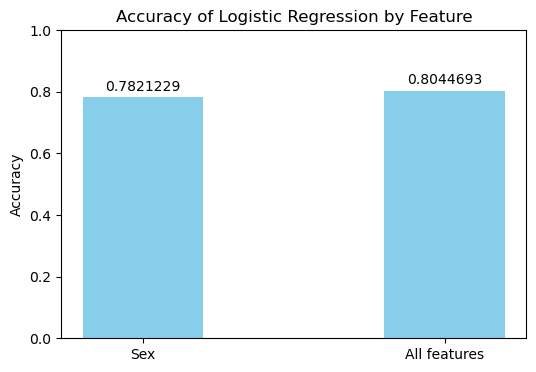

In [19]:
features = [X.columns[best_singel_feature_idx], "All features"] 
accuracies = [accuracy[best_singel_feature_idx],accuracy[-1]]
# Plot accuracy comparation for the best singel feature and all features
plt.figure(figsize=(6,4))
for i in range(2):
    plt.bar(features[i], accuracies[i], color='skyblue',width=0.4)
    plt.text(i, accuracies[i]+ 0.02, f"{accuracies[i]:.7f}", ha='center')  

plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Accuracy of Logistic Regression by Feature')
plt.show()